In [278]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from ast import literal_eval


In [279]:
data=pd.read_csv('PassPerStartersBulls.csv')

In [280]:
data.head(8)

,Name,Total Touches,Passed By,Date
0,Demar Derozan,71,"['Coby White', 'Dalen Terry', 'Nikola Vucevic'...",4/14/2024
1,Coby White,70,"['Demar Derozan', 'Javonte Green', 'Nikola Vuc...",4/14/2024
2,Javonte Green,55,"['Torrey Craig', 'Dalen Terry', 'Dalen Terry',...",4/14/2024
3,Alex Caruso,59,"['Javonte Green', 'Demar Derozan', 'Javonte Gr...",4/14/2024
4,Nikola Vucevic,68,"['Javonte Green', 'Demar Derozan', 'Alex Carus...",4/14/2024
5,Torrey Craig,20,"['Javonte Green', 'Nikola Vucevic', 'Demar Der...",4/14/2024
6,Jevon Carter,18,"['Nikola Vucevic', 'Coby White', 'Demar Deroza...",4/14/2024
7,Dalen Terry,33,"['Coby White', 'Alex Caruso', 'Coby White', 'C...",4/14/2024


In [281]:
data['Passed By']

0    ['Coby White', 'Dalen Terry', 'Nikola Vucevic'...
1    ['Demar Derozan', 'Javonte Green', 'Nikola Vuc...
2    ['Torrey Craig', 'Dalen Terry', 'Dalen Terry',...
3    ['Javonte Green', 'Demar Derozan', 'Javonte Gr...
4    ['Javonte Green', 'Demar Derozan', 'Alex Carus...
5    ['Javonte Green', 'Nikola Vucevic', 'Demar Der...
6    ['Nikola Vucevic', 'Coby White', 'Demar Deroza...
7    ['Coby White', 'Alex Caruso', 'Coby White', 'C...
Name: Passed By, dtype: object

In [282]:
data['Passed By'].iloc[0]

"['Coby White', 'Dalen Terry', 'Nikola Vucevic', 'Alex Caruso', 'Javonte Green', 'Dalen Terry', 'Alex Caruso', 'Javonte Green', 'Alex Caruso', 'Jevon Carter', 'Javonte Green', 'Dalen Terry', 'Coby White', 'Dalen Terry', 'Coby White', 'Torrey Craig', 'Alex Caruso', 'Coby White', 'Torrey Craig', 'Jevon Carter', 'Torrey Craig', 'Javonte Green', 'Javonte Green', 'Torrey Craig', 'Jevon Carter', 'Coby White', 'Nikola Vucevic', 'Nikola Vucevic', 'Javonte Green', 'Coby White', 'Coby White', 'Dalen Terry', 'Nikola Vucevic', 'Dalen Terry', 'Coby White', 'Torrey Craig', 'Dalen Terry', 'Alex Caruso', 'Alex Caruso', 'Nikola Vucevic', 'Coby White', 'Javonte Green', 'Coby White', 'Jevon Carter', 'Jevon Carter', 'Dalen Terry', 'Jevon Carter', 'Torrey Craig', 'Jevon Carter', 'Coby White', 'Alex Caruso', 'Javonte Green', 'Coby White', 'Nikola Vucevic', 'Dalen Terry', 'Dalen Terry', 'Jevon Carter', 'Alex Caruso', 'Javonte Green', 'Dalen Terry', 'Torrey Craig', 'Coby White', 'Dalen Terry', 'Dalen Terry', 

In [283]:

data['Passed By'] = data['Passed By'].apply(ast.literal_eval)
edges = []
for idx, val in data.iterrows():
    if len(val['Passed By']) == 0: 
        continue
    elif len(val['Passed By']) > 0: 
        for mention in val['Passed By']:
            edges.append((val['Name'].lower(), mention.strip('@').lower()))  
edges[:200]


[('demar derozan', 'coby white'),
 ('demar derozan', 'dalen terry'),
 ('demar derozan', 'nikola vucevic'),
 ('demar derozan', 'alex caruso'),
 ('demar derozan', 'javonte green'),
 ('demar derozan', 'dalen terry'),
 ('demar derozan', 'alex caruso'),
 ('demar derozan', 'javonte green'),
 ('demar derozan', 'alex caruso'),
 ('demar derozan', 'jevon carter'),
 ('demar derozan', 'javonte green'),
 ('demar derozan', 'dalen terry'),
 ('demar derozan', 'coby white'),
 ('demar derozan', 'dalen terry'),
 ('demar derozan', 'coby white'),
 ('demar derozan', 'torrey craig'),
 ('demar derozan', 'alex caruso'),
 ('demar derozan', 'coby white'),
 ('demar derozan', 'torrey craig'),
 ('demar derozan', 'jevon carter'),
 ('demar derozan', 'torrey craig'),
 ('demar derozan', 'javonte green'),
 ('demar derozan', 'javonte green'),
 ('demar derozan', 'torrey craig'),
 ('demar derozan', 'jevon carter'),
 ('demar derozan', 'coby white'),
 ('demar derozan', 'nikola vucevic'),
 ('demar derozan', 'nikola vucevic'),

In [284]:

basketball_data = pd.read_csv('PassPerStartersBulls.csv')
basketball_data['Passed By'] = basketball_data['Passed By'].apply(ast.literal_eval)

In [285]:
# Specify the starters and their positions 
# Create Dictionary 
players = ['Coby White', 'Alex Caruso', 'Demar Derozan', 'Javonte Green', 'Nikola Vucevic','Torrey Craig','Jevon Carter','Dalen Terry']
positions = {
    'Coby White': 'Point Guard', 
    'Alex Caruso': 'Shooting Guard',
    'Demar Derozan': 'Small Forward',
    'Javonte Green': 'Power Forward',
    'Nikola Vucevic': 'Center',
    'Torrey Craig' : 'Small Forward',
    'Jevon Carter':'Point Guard',
    'Dalen Terry':'Shooting Guard'
        
}

In [286]:
# Filter data
filtered_data = basketball_data[basketball_data['Name'].isin(players)]

In [287]:
# Initialize the graph
G = nx.DiGraph()

In [288]:
# Add nodes for each positions
for player in players:
    G.add_node(player, position=positions[player])

In [289]:
# Added weighted edges based on pass counts
for index, row in filtered_data.iterrows():
    for passer in row['Passed By']:
        if passer in players:
            if G.has_edge(passer, row['Name']):
                G[passer][row['Name']]['weight'] += 1
            else:
                G.add_edge(passer, row['Name'], weight=1)

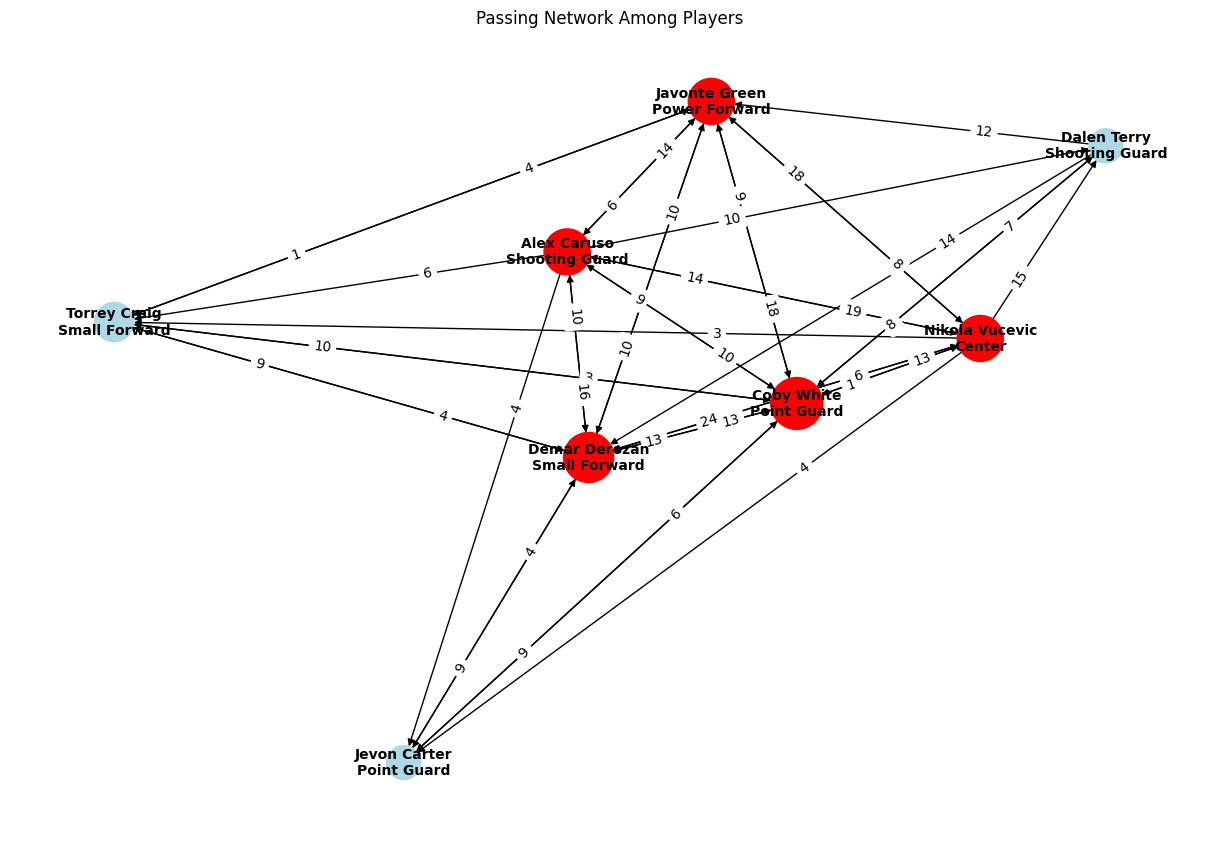

In [290]:

import networkx as nx
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)  
plt.figure(figsize=(12, 8))

# Define highlighted players
highlighted_players = ['Demar Derozan', 'Coby White', 'Nikola Vucevic', 'Alex Caruso', 'Javonte Green']
node_colors = ['red' if node in highlighted_players else 'lightblue' for node in G.nodes()]

sizes = [G.degree[node] * 100 for node in G.nodes()]
labels = {node: f"{node}\n{positions[node]}" for node in G.nodes()}

nx.draw(G, pos, with_labels=True, labels=labels, node_color=node_colors, node_size=sizes, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in G.edges()}, label_pos=0.3)
plt.title('Passing Network Among Players')
plt.show()

In [291]:
# Output the graph centrality 
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'Coby White': 2.0,
 'Alex Caruso': 1.5714285714285714,
 'Demar Derozan': 1.857142857142857,
 'Javonte Green': 1.5714285714285714,
 'Nikola Vucevic': 1.5714285714285714,
 'Torrey Craig': 1.1428571428571428,
 'Jevon Carter': 0.8571428571428571,
 'Dalen Terry': 0.8571428571428571}